In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import cv2
import random
from PIL import Image

### **NIH**

##### **_Consolidate all csv records_**

In [16]:
balanced_test = pd.read_csv('NIH CXR/nih-cxr-lt_single-label_balanced-test.csv')
b_test_p = balanced_test.loc[balanced_test['Pneumonia'] > 0, ['id', 'subject_id', 'Pneumonia']]
b_test_n = balanced_test.loc[balanced_test['Pneumonia'] == 0, ['id', 'subject_id', 'Pneumonia']]
b_test_p.head(), b_test_n.head()

(                   id  subject_id  Pneumonia
 360  00003510_008.png        3510          1
 361  00003510_009.png        3510          1
 362  00003510_010.png        3510          1
 363  00004893_027.png        4893          1
 364  00004893_070.png        4893          1,
                  id  subject_id  Pneumonia
 0  00000583_003.png         583          0
 1  00000583_008.png         583          0
 2  00000583_009.png         583          0
 3  00000583_010.png         583          0
 4  00000583_031.png         583          0)

In [17]:
balanced_val = pd.read_csv('NIH CXR/nih-cxr-lt_single-label_balanced-val.csv')
b_val_p = balanced_val.loc[balanced_val['Pneumonia'] > 0, ['id', 'subject_id', 'Pneumonia']]
b_val_n = balanced_val.loc[balanced_val['Pneumonia'] == 0, ['id', 'subject_id', 'Pneumonia']]
b_val_p, b_val_n

(                   id  subject_id  Pneumonia
 180  00001529_002.png        1529          1
 181  00001529_005.png        1529          1
 182  00001582_019.png        1582          1
 183  00001582_021.png        1582          1
 184  00001749_002.png        1749          1
 185  00001749_003.png        1749          1
 186  00001946_007.png        1946          1
 187  00001946_024.png        1946          1
 188  00018926_001.png       18926          1
 189  00019275_001.png       19275          1
 190  00019275_002.png       19275          1
 191  00022156_007.png       22156          1
 192  00022156_008.png       22156          1
 193  00022192_032.png       22192          1
 194  00022192_038.png       22192          1,
                    id  subject_id  Pneumonia
 0    00003109_004.png        3109          0
 1    00003109_006.png        3109          0
 2    00003109_008.png        3109          0
 3    00018657_001.png       18657          0
 4    00018657_008.png       1865

In [18]:
single_test = pd.read_csv('NIH CXR/nih-cxr-lt_single-label_test.csv')
s_test_p = single_test.loc[single_test['Pneumonia'] > 0, ['id', 'subject_id', 'Pneumonia']]
s_test_n = single_test.loc[single_test['Pneumonia'] == 0, ['id', 'subject_id', 'Pneumonia']]
s_test_p, s_test_n

(                     id  subject_id  Pneumonia
 547    00000583_045.png         583          1
 816    00001018_005.png        1018          1
 1047   00001247_011.png        1247          1
 1588   00001992_002.png        1992          1
 2404   00003092_000.png        3092          1
 ...                 ...         ...        ...
 17668  00025383_002.png       25383          1
 17766  00025607_001.png       25607          1
 18014  00026085_000.png       26085          1
 18213  00026366_001.png       26366          1
 18221  00026374_004.png       26374          1
 
 [85 rows x 3 columns],
                      id  subject_id  Pneumonia
 0      00000003_000.png           3          0
 1      00000003_001.png           3          0
 2      00000003_002.png           3          0
 3      00000003_004.png           3          0
 4      00000003_005.png           3          0
 ...                 ...         ...        ...
 20274  00030777_000.png       30777          0
 20275  000307

In [19]:
single_train = pd.read_csv('NIH CXR/nih-cxr-lt_single-label_train.csv')
s_train_p = single_train.loc[single_train['Pneumonia'] > 0, ['id', 'subject_id', 'Pneumonia']]
s_train_n = single_train.loc[single_train['Pneumonia'] == 0, ['id', 'subject_id', 'Pneumonia']]
s_train_p, s_train_n

(                     id  subject_id  Pneumonia
 98     00000061_015.png          61          1
 229    00000144_001.png         144          1
 256    00000165_001.png         165          1
 340    00000193_019.png         193          1
 399    00000218_001.png         218          1
 ...                 ...         ...        ...
 65056  00028924_005.png       28924          1
 65999  00029481_004.png       29481          1
 66697  00029889_000.png       29889          1
 67039  00030079_018.png       30079          1
 67835  00030621_002.png       30621          1
 
 [213 rows x 3 columns],
                      id  subject_id  Pneumonia
 0      00000001_000.png           1          0
 1      00000002_000.png           2          0
 2      00000005_000.png           5          0
 3      00000005_001.png           5          0
 4      00000005_002.png           5          0
 ...                 ...         ...        ...
 68053  00030801_000.png       30801          0
 68054  00030

In [316]:
nih_pneumonia_p = pd.concat([b_val_p, b_test_p, s_test_p, s_train_p], ignore_index=True).drop_duplicates(subset=['id'])
nih_pneumonia_n = pd.concat([b_val_n, b_test_n, s_test_n, s_train_n], ignore_index=True).drop_duplicates(subset=['id'])
nih_pneumonia_p['Category'] = 'Pneumonia'
nih_pneumonia_n['Category'] = 'Non-Pneumonia'
nih_pneumonia_p = nih_pneumonia_p.rename(columns={'Pneumonia': 'Label'})
nih_pneumonia_n = nih_pneumonia_n.rename(columns={'Pneumonia': 'Label'})

##### **_Remove excess (trim down from ~100k to 3k images to balance final distribution_**

In [ ]:
# RUN ONLY ONCE: Move the pneumonia images to a separate directory based on the csv data
# Images (non-pneumonia and pneumonia) were combined into a single directory prior separation
"""
try:
    os.mkdir('NIH CXR/pneumonia')
except FileExistsError:
    pass

nih_data_path = 'NIH CXR/images/'
nih_data = os.listdir(nih_data_path)
for file in nih_data:
    try:
        if file in nih_pneumonia_p.id.values:
            try:
                shutil.move(nih_data_path+file, 'NIH CXR/pneumonia')
                print(f'File was moved successfully.')
            except Exception as exc:
                print(f'An error occurred {exc}')
    except IndexError:
        continue
"""

In [88]:
# Move to separate folder excess non-pneumonia files not found in csv records
"""
path = 'NIH CXR/images/'
imgs = os.listdir(path)
for i in imgs:
    if i not in nih_pneumonia_n['id'].values:
        try:
            os.mkdir('NIH CXR/excess/')
            shutil.move(path+i, 'NIH CXR/excess/')
        except FileExistsError:
            print('Already made a directory')
            shutil.move(path+i, 'NIH CXR/excess/')
"""

"path = 'NIH CXR/images/'\nimgs = os.listdir(path)\nfor i in imgs:\n    if i not in nih_pneumonia_n['id'].values:\n        try:\n            os.mkdir('NIH CXR/excess/')\n            shutil.move(path+i, 'NIH CXR/excess/')\n        except FileExistsError:\n            print('Already made a directory')\n            shutil.move(path+i, 'NIH CXR/excess/')"

In [317]:
# Remove excess non-pneumonia files to match total record count.
path1 = 'NIH CXR/pneumonia/'
path2 = 'NIH CXR/non_pneumonia/'
excess_dir = os.listdir(path2)
condition = ~nih_pneumonia_n['id'].isin(excess_dir)
nih_pneumonia_n = nih_pneumonia_n.drop(nih_pneumonia_n[condition].index).reset_index(drop=True)
nih_pneumonia_n.head()


,id,subject_id,Label,Category
0,00000032_000.png,32,0,Non-Pneumonia
1,00000032_021.png,32,0,Non-Pneumonia
2,00000032_029.png,32,0,Non-Pneumonia
3,00000032_053.png,32,0,Non-Pneumonia
4,00000032_055.png,32,0,Non-Pneumonia


##### **_Detect dimensions for all dataset classes_**

In [318]:
# Function for identifying image dimensions
def identify_size(array1, path1, df1, label1, array2=None, path2=None, df2=None, label2=None):
    size_array1 = []
    size_array2 = []

    for i in array1:
        img_path = path1 + i
        img = Image.open(img_path)
        width, height = img.size
        size_array1.append(f'{height} x {width}')
    df1[label1] = size_array1

    try:
        if array2 != None:
            for i in array2:
                img_path = path2 + i
                img = Image.open(img_path)
                width, height = img.size
                size_array2.append(f'{height} x {width}')
            df2[label2] = size_array2
        else:
            pass
    except Exception as e:
        print(e)

identify_size(array1=nih_pneumonia_p['id'].values.tolist(), path1=path1, df1=nih_pneumonia_p, label1='size', array2=nih_pneumonia_n['id'].values.tolist(), path2=path2, df2=nih_pneumonia_n, label2='size')

In [319]:
# add parent directory to file names
nih_pneumonia_p['id'] = path1 + nih_pneumonia_p['id']
nih_pneumonia_n['id'] = path2 + nih_pneumonia_n['id']

In [320]:
# concat normal/non_pneumonia and pneumonia df for NIH
nih_df = pd.concat([nih_pneumonia_p, nih_pneumonia_n], ignore_index=True)
nih_df

,id,subject_id,Label,Category,size
0,NIH CXR/pneumonia/00001529_002.png,1529,1,Pneumonia,1024 x 1024
1,NIH CXR/pneumonia/00001529_005.png,1529,1,Pneumonia,1024 x 1024
2,NIH CXR/pneumonia/00001582_019.png,1582,1,Pneumonia,1024 x 1024
3,NIH CXR/pneumonia/00001582_021.png,1582,1,Pneumonia,1024 x 1024
4,NIH CXR/pneumonia/00001749_002.png,1749,1,Pneumonia,1024 x 1024
...,...,...,...,...,...
3311,NIH CXR/non_pneumonia/00001023_003.png,1023,0,Non-Pneumonia,1024 x 1024
3312,NIH CXR/non_pneumonia/00001024_000.png,1024,0,Non-Pneumonia,1024 x 1024
3313,NIH CXR/non_pneumonia/00001025_000.png,1025,0,Non-Pneumonia,1024 x 1024
3314,NIH CXR/non_pneumonia/00001027_000.png,1027,0,Non-Pneumonia,1024 x 1024


##### **_Generate csv for each class and total record_**

In [321]:
#nih_csv_p = nih_pneumonia_p.to_csv('NIH CXR/nih_cxr_lt_pneumonia.csv')
#nih_csv_n = nih_pneumonia_n.to_csv('NIH CXR/nih_cxr_lt_normal.csv')
#nih_csv = nih_df.to_csv('NIH CXR/nih_cxr_all.csv')

In [322]:
print(f'Pneumonia: {len(nih_pneumonia_p)}\nNon-Pneumonia: {len(nih_pneumonia_n)}')

Pneumonia: 313
Non-Pneumonia: 3003


#### **Mendeley**

In [334]:
# set path variables
path1 = 'Mendeley/pneumonia/'
path2 = 'Mendeley/normal/'
mendel_p = os.listdir(path1)
mendel_n = os.listdir(path2)
# generate dataframe and add parent dir to filenames
mendel_df_p = pd.DataFrame({'id': mendel_p, 'Category': 'Pneumonia', 'Label': 1})
mendel_df_n = pd.DataFrame({'id': mendel_n, 'Category': 'Normal', 'Label': 0})
mendel_df_p['id'] = path1 + mendel_df_p['id']
mendel_df_n['id'] = path2 + mendel_df_n['id']

In [338]:
# detect dimensions and add new column to dataframe
identify_size(array1=mendel_p, path1=path1, df1=mendel_df_p, label1='size', 
              array2=mendel_n, path2=path2, df2=mendel_df_n, label2='size')

In [339]:
# concat classes for mendeley dataset
mendel_df = pd.concat([mendel_df_n, mendel_df_p], ignore_index=True)
mendel_df.head()

,id,Category,Label,size
0,Mendeley/normal/NORMAL-1003233-0001.jpeg,Normal,0,2476 x 2572
1,Mendeley/normal/NORMAL-1012843-0001.jpeg,Normal,0,1751 x 1982
2,Mendeley/normal/NORMAL-1014768-0001.jpeg,Normal,0,1013 x 1236
3,Mendeley/normal/NORMAL-1023731-0001.jpeg,Normal,0,1206 x 1414
4,Mendeley/normal/NORMAL-1029510-0001.jpeg,Normal,0,1449 x 1786


##### **_Generate csv for mendeley_**

In [340]:
#mendel_df_p.to_csv('Mendeley/pneumonia.csv')
#mendel_df_n.to_csv('Mendeley/normal.csv')
#mendel_df.to_csv('Mendeley/all.csv')

In [341]:
print(f'Normal: {len(mendel_n)}\nPneumonia: {len(mendel_p)}')

Normal: 1591
Pneumonia: 4281


#### **RSNA**

In [342]:
# set path variables
path1 = 'RSNA/pneumonia/'
path2 = 'RSNA/normal/'
rsna_p = os.listdir(path1)
rsna_n = os.listdir(path2)
# create dataframe and add parent dir to filenames
rsna_df_p = pd.DataFrame({'id': rsna_p, 'Category': 'Pneumonia', 'Label': 1})
rsna_df_n = pd.DataFrame({'id': rsna_n, 'Category': 'Normal', 'Label': 0})
rsna_df_p['id'] = path1+rsna_df_p['id']
rsna_df_n['id'] = path2+rsna_df_n['id']

In [343]:
# detect dimensions and add column
identify_size(array1=rsna_p, path1=path1, df1=rsna_df_p, label1='size', 
              array2=rsna_n, path2=path2, df2=rsna_df_n, label2='size')

In [344]:
# concat classes for rsna
rsna_df = pd.concat([rsna_df_n, rsna_df_p], ignore_index=True)
rsna_df.head()

,id,Category,Label,size
0,RSNA/normal/0010f549-b242-4e94-87a8-57d79de215...,Normal,0,1024 x 1024
1,RSNA/normal/0022995a-45eb-4cfa-9a59-cd15f5196c...,Normal,0,1024 x 1024
2,RSNA/normal/0025d2de-bd78-4d36-9f72-e15a5e22ca...,Normal,0,1024 x 1024
3,RSNA/normal/005f5517-ab76-4b0d-8a26-f808d97171...,Normal,0,1024 x 1024
4,RSNA/normal/0088be53-27f2-4c30-882b-a73a3a5c8c...,Normal,0,1024 x 1024


##### **_Generate csv for rsna_**

In [346]:
#rsna_df_p.to_csv('RSNA/pneumonia.csv')
#rsna_df_n.to_csv('RSNA/normal.csv')
#rsna_df.to_csv('RSNA/all.csv')

In [347]:
print(f'Normal: {len(rsna_n)}\nPneumonia: {len(rsna_p)}')

Normal: 5000
Pneumonia: 5000


#### **_Visualise Counts_**

In [116]:
# function for bar values in plots
def output_values(ax=[]):
    try:
        for item in ax:
            for container in item.containers:
                item.bar_label(container)
    except Exception as e:
        print(e)

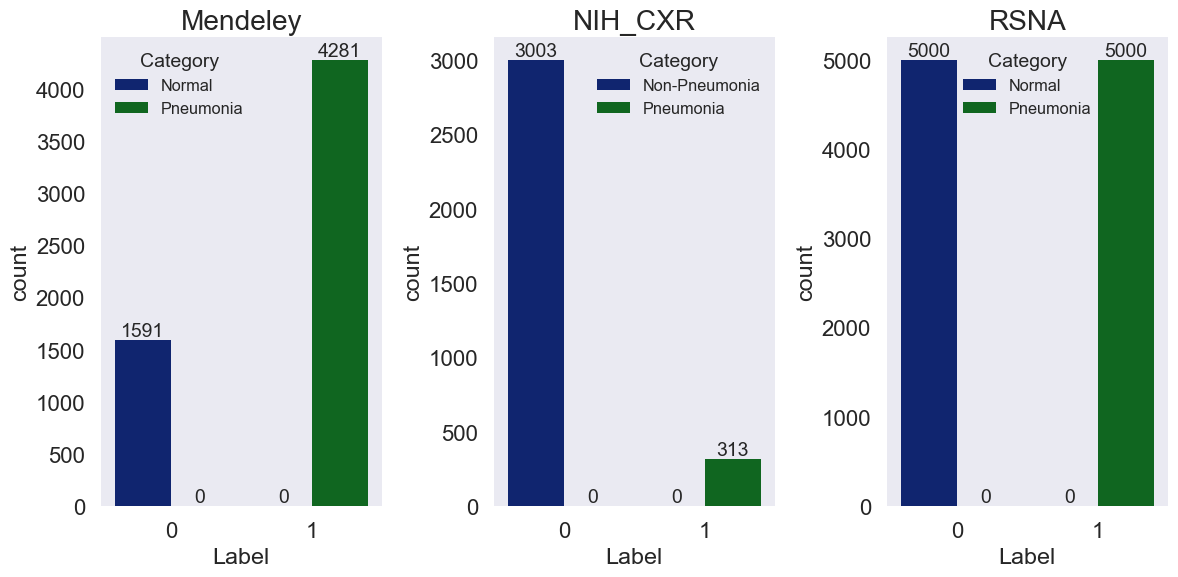

In [232]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
plt.style.use('seaborn-v0_8-dark-palette')

ax1.set_title('Mendeley')
ax1 = sns.countplot(data=mendel_df, x='Label', hue='Category', ax=ax1)
ax1.legend(title='Category', loc='best', fontsize='small')

ax2.set_title('NIH_CXR')
ax2 = sns.countplot(data=nih_df, x='Label', hue='Category', ax=ax2, hue_order=['Non-Pneumonia', 'Pneumonia'])
ax2.legend(title='Category', loc='best', fontsize='small')

ax3.set_title('RSNA')
ax3 = sns.countplot(data=rsna_df, x='Label', hue='Category', ax=ax3)
ax3.legend(title='Category', loc='upper center', fontsize='small')

output_values(ax=[ax1, ax2, ax3])
plt.tight_layout()
plt.show()

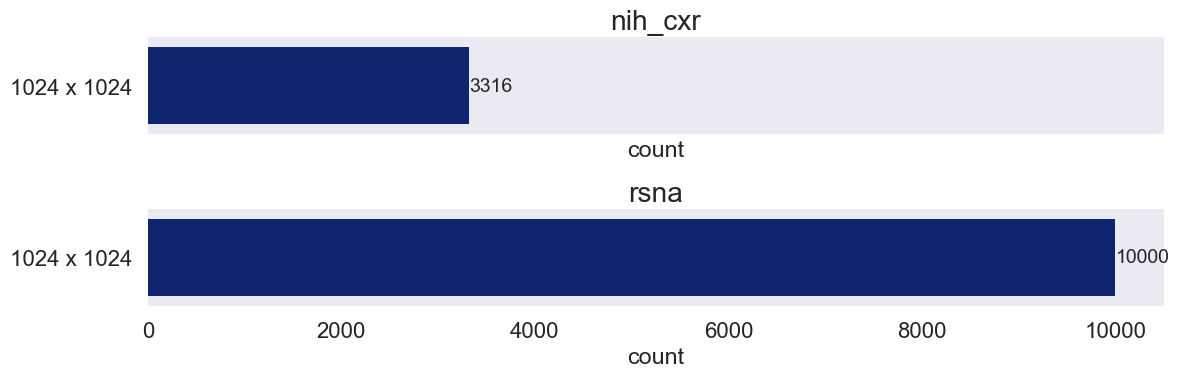

In [233]:
# Mendeley set has more than 5,000 unique image dimensions. Need to rescale all images.

fig, (ax1,ax2) = plt.subplots(2, figsize=(12, 4), sharex=True)

nih_dist = nih_df['size'].value_counts()
rsna_dist = rsna_df['size'].value_counts()

ax1.set_title('nih_cxr')
ax1 = sns.barplot(x=nih_dist, y=list(nih_dist.keys()), orient='h', ax=ax1)


ax2.set_title('rsna')
ax2 = sns.barplot(x=rsna_dist, y=list(rsna_dist.keys()),orient='h', ax=ax2)

output_values(ax=[ax1, ax2])
plt.tight_layout()
plt.show()

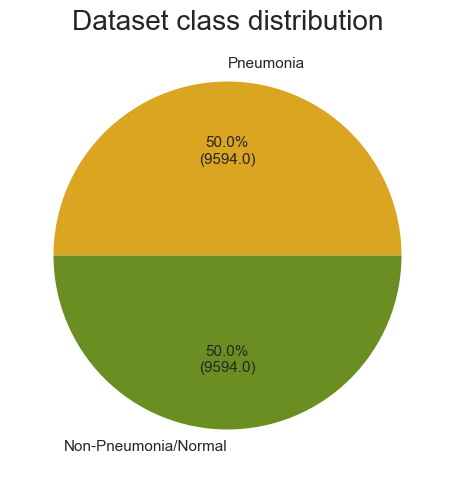

In [278]:
pneumonia = len(nih_pneumonia_p) + len(mendel_df_p) + len(rsna_df_p)
non_pneumonia = len(nih_pneumonia_n) + len(mendel_df_n) + len(rsna_df_n)
total = pneumonia + non_pneumonia

fig, ax = plt.subplots(figsize=(5, 5))
sizes = [pneumonia, non_pneumonia]
labels = ['Pneumonia', 'Non-Pneumonia/Normal']
ax.pie(sizes, labels=labels, autopct=lambda pct: f'{pct:.1f}%\n({(int(pct)*sum(sizes)) / 100})', colors=['goldenrod', 'olivedrab'], textprops={'fontsize': 11})
plt.title('Dataset class distribution')
plt.show()

##### **_Sample Pneumonia images_**

In [348]:
data_pneumonia = pd.concat([nih_pneumonia_p, mendel_df_p, rsna_df_p], ignore_index=True)
data_non_pneumonia = pd.concat([nih_pneumonia_n, mendel_df_n, rsna_df_n], ignore_index=True)

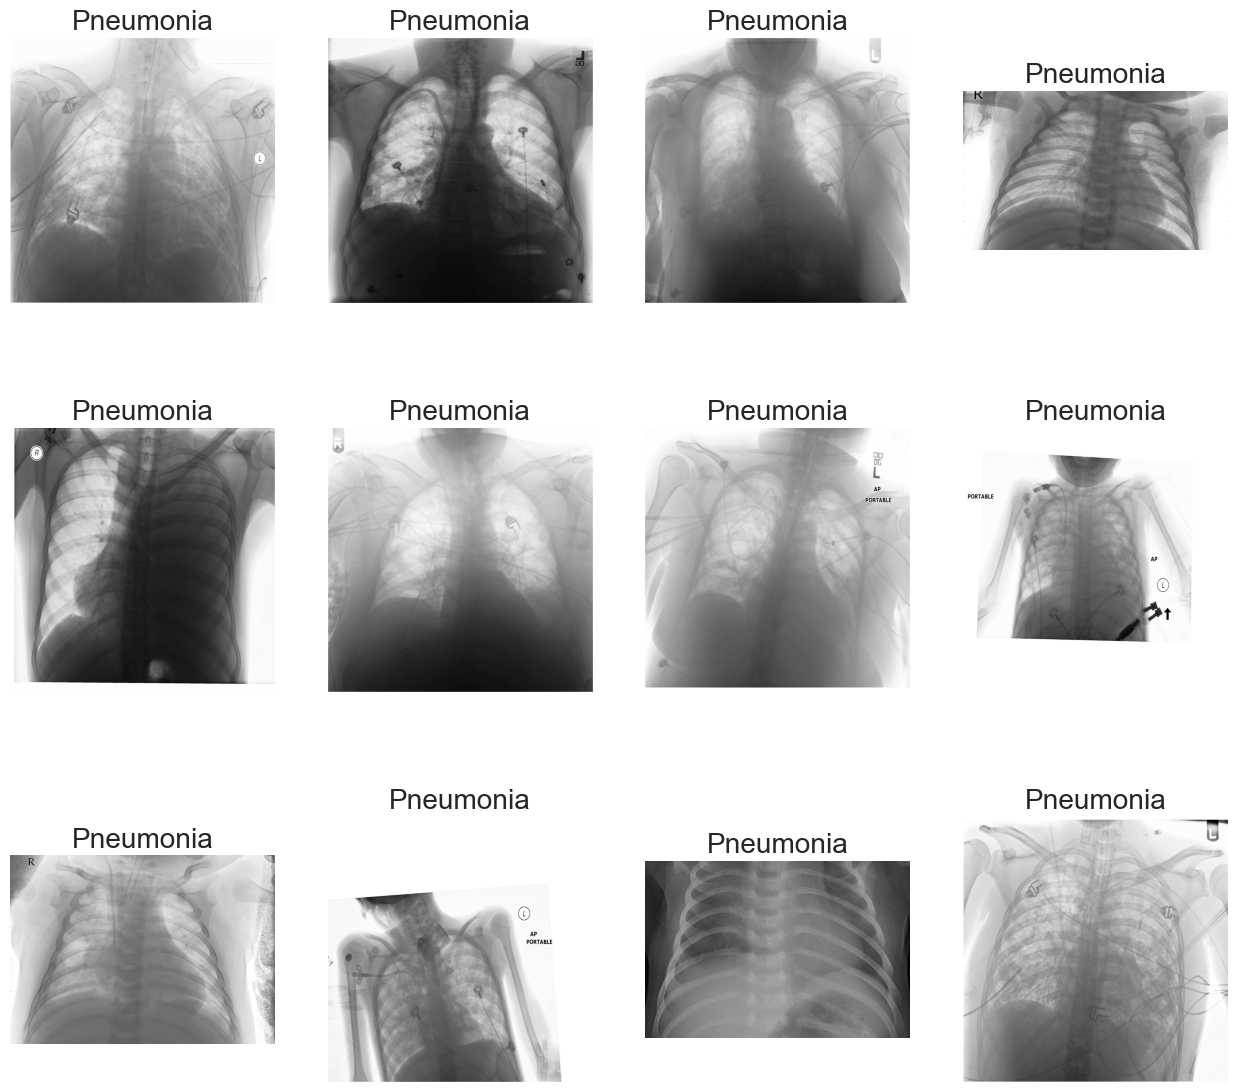

In [365]:
plt.figure(figsize = (14,12))
for i in range(12):
        samp = random.sample(data_pneumonia.index.to_list(), 1)
        plt.subplot(3,4,i+1)
        plt.imshow(Image.open(data_pneumonia.iloc[samp[0],0])) # selected_value = df.iloc[row_index, column_index]
        plt.title(data_pneumonia.iloc[samp[0],3])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
plt.show()

##### **_Sample non-pneumonia/normal images_**

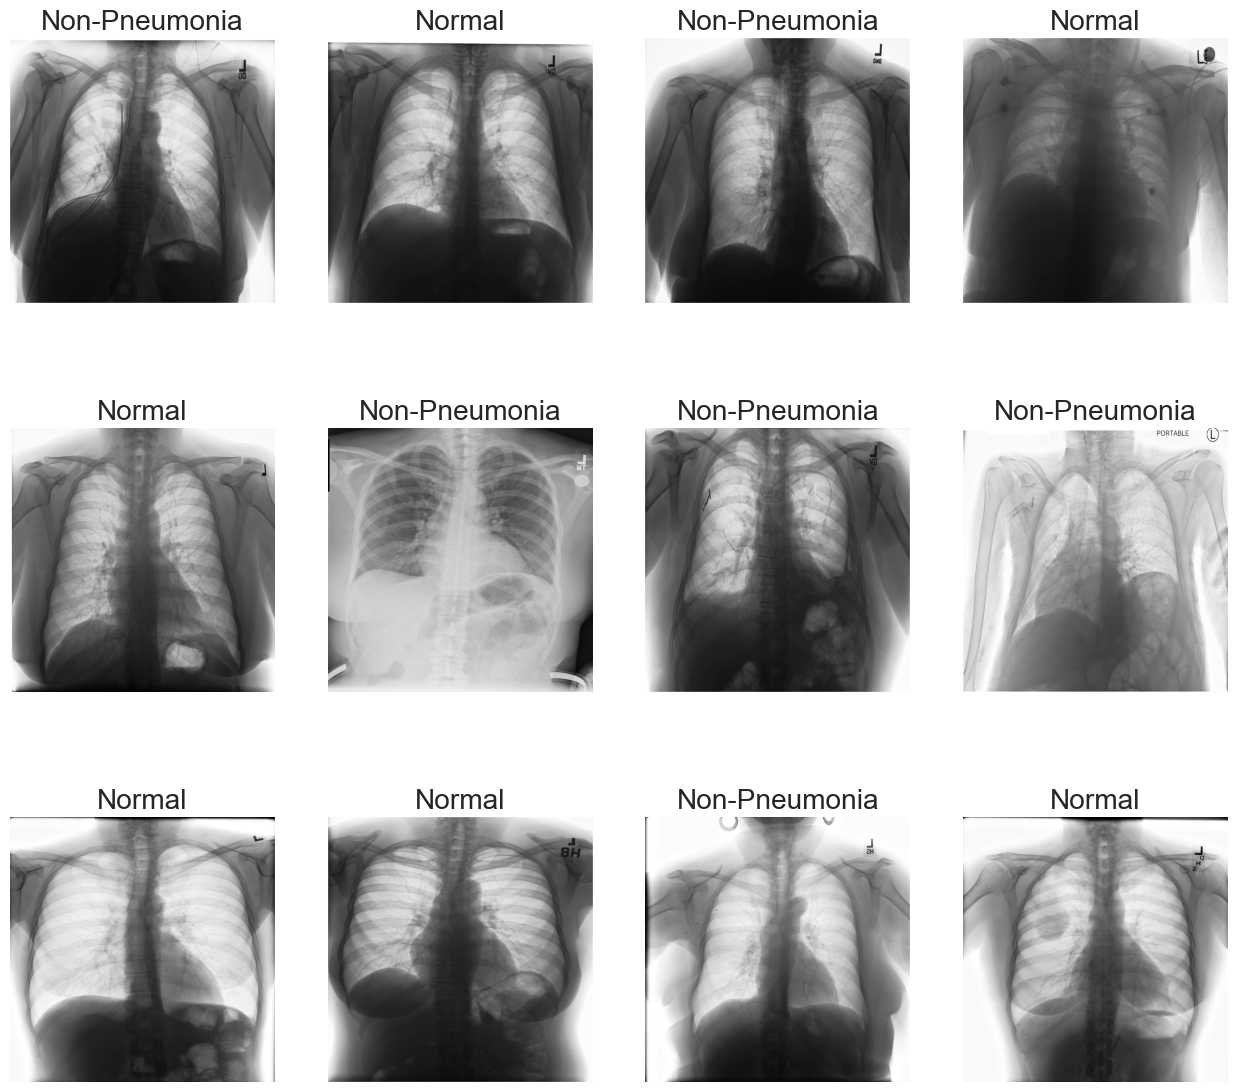

In [366]:
plt.figure(figsize = (14,12))
for i in range(12):
        samp = random.sample(data_non_pneumonia.index.to_list(), 1)
        plt.subplot(3,4,i+1)
        plt.imshow(Image.open(data_non_pneumonia.iloc[samp[0],0])) # selected_value = df.iloc[row_index, column_index]
        plt.title(data_non_pneumonia.iloc[samp[0],3])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
plt.show()